In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.regularizers import l1,l2
from keras.layers.core import Dropout
from sklearn import preprocessing

In [78]:
df = pd.read_csv('supermarket_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [79]:
# for i in df:
#     try:
#         if(i.astype('float32')):
#             i = np.asarray(i).astype('float32')
#     except:
# #         continue

In [80]:
# df['Quantity']=pd.to_numeric(df[i])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [82]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [84]:
le = preprocessing.LabelEncoder()
for i in df:
    df[i] = le.fit_transform(df[i])

In [85]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,670,6,804,804,26,146,2,804,0,804,51
1,142,2,1,1,0,0,50,4,144,144,87,23,0,144,0,144,56
2,653,0,2,1,1,4,370,6,609,609,81,155,1,609,0,609,34
3,18,0,2,0,1,3,501,7,756,756,19,485,2,756,0,756,44
4,339,0,2,1,1,5,782,6,857,857,57,29,2,857,0,857,13


In [86]:
#df = df.drop('id',axis=1)
#df = df.drop('date',axis=1)
#df= df.drop("zipcode",axis=1)
df.describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,499.500000,0.988000,1.008000,0.499000,0.499000,2.452000,470.1380,4.510000,494.247000,494.247000,44.582000,251.176000,1.001000,494.247000,0.0,494.247000,29.727000
std,288.819436,0.817633,0.820127,0.500249,0.500249,1.715412,272.1575,2.923431,285.378477,285.378477,25.894745,147.066923,0.830475,285.378477,0.0,285.378477,17.185803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,249.750000,0.000000,0.000000,0.000000,0.000000,1.000000,234.7500,2.000000,247.750000,247.750000,21.000000,127.000000,0.000000,247.750000,0.0,247.750000,15.000000
50%,499.500000,1.000000,1.000000,0.000000,0.000000,2.000000,467.5000,4.000000,493.500000,493.500000,46.000000,248.000000,1.000000,493.500000,0.0,493.500000,30.000000
75%,749.250000,2.000000,2.000000,1.000000,1.000000,4.000000,705.2500,7.000000,740.250000,740.250000,67.000000,383.000000,2.000000,740.250000,0.0,740.250000,45.000000
max,999.000000,2.000000,2.000000,1.000000,1.000000,5.000000,942.0000,9.000000,989.000000,989.000000,88.000000,505.000000,2.000000,989.000000,0.0,989.000000,60.000000


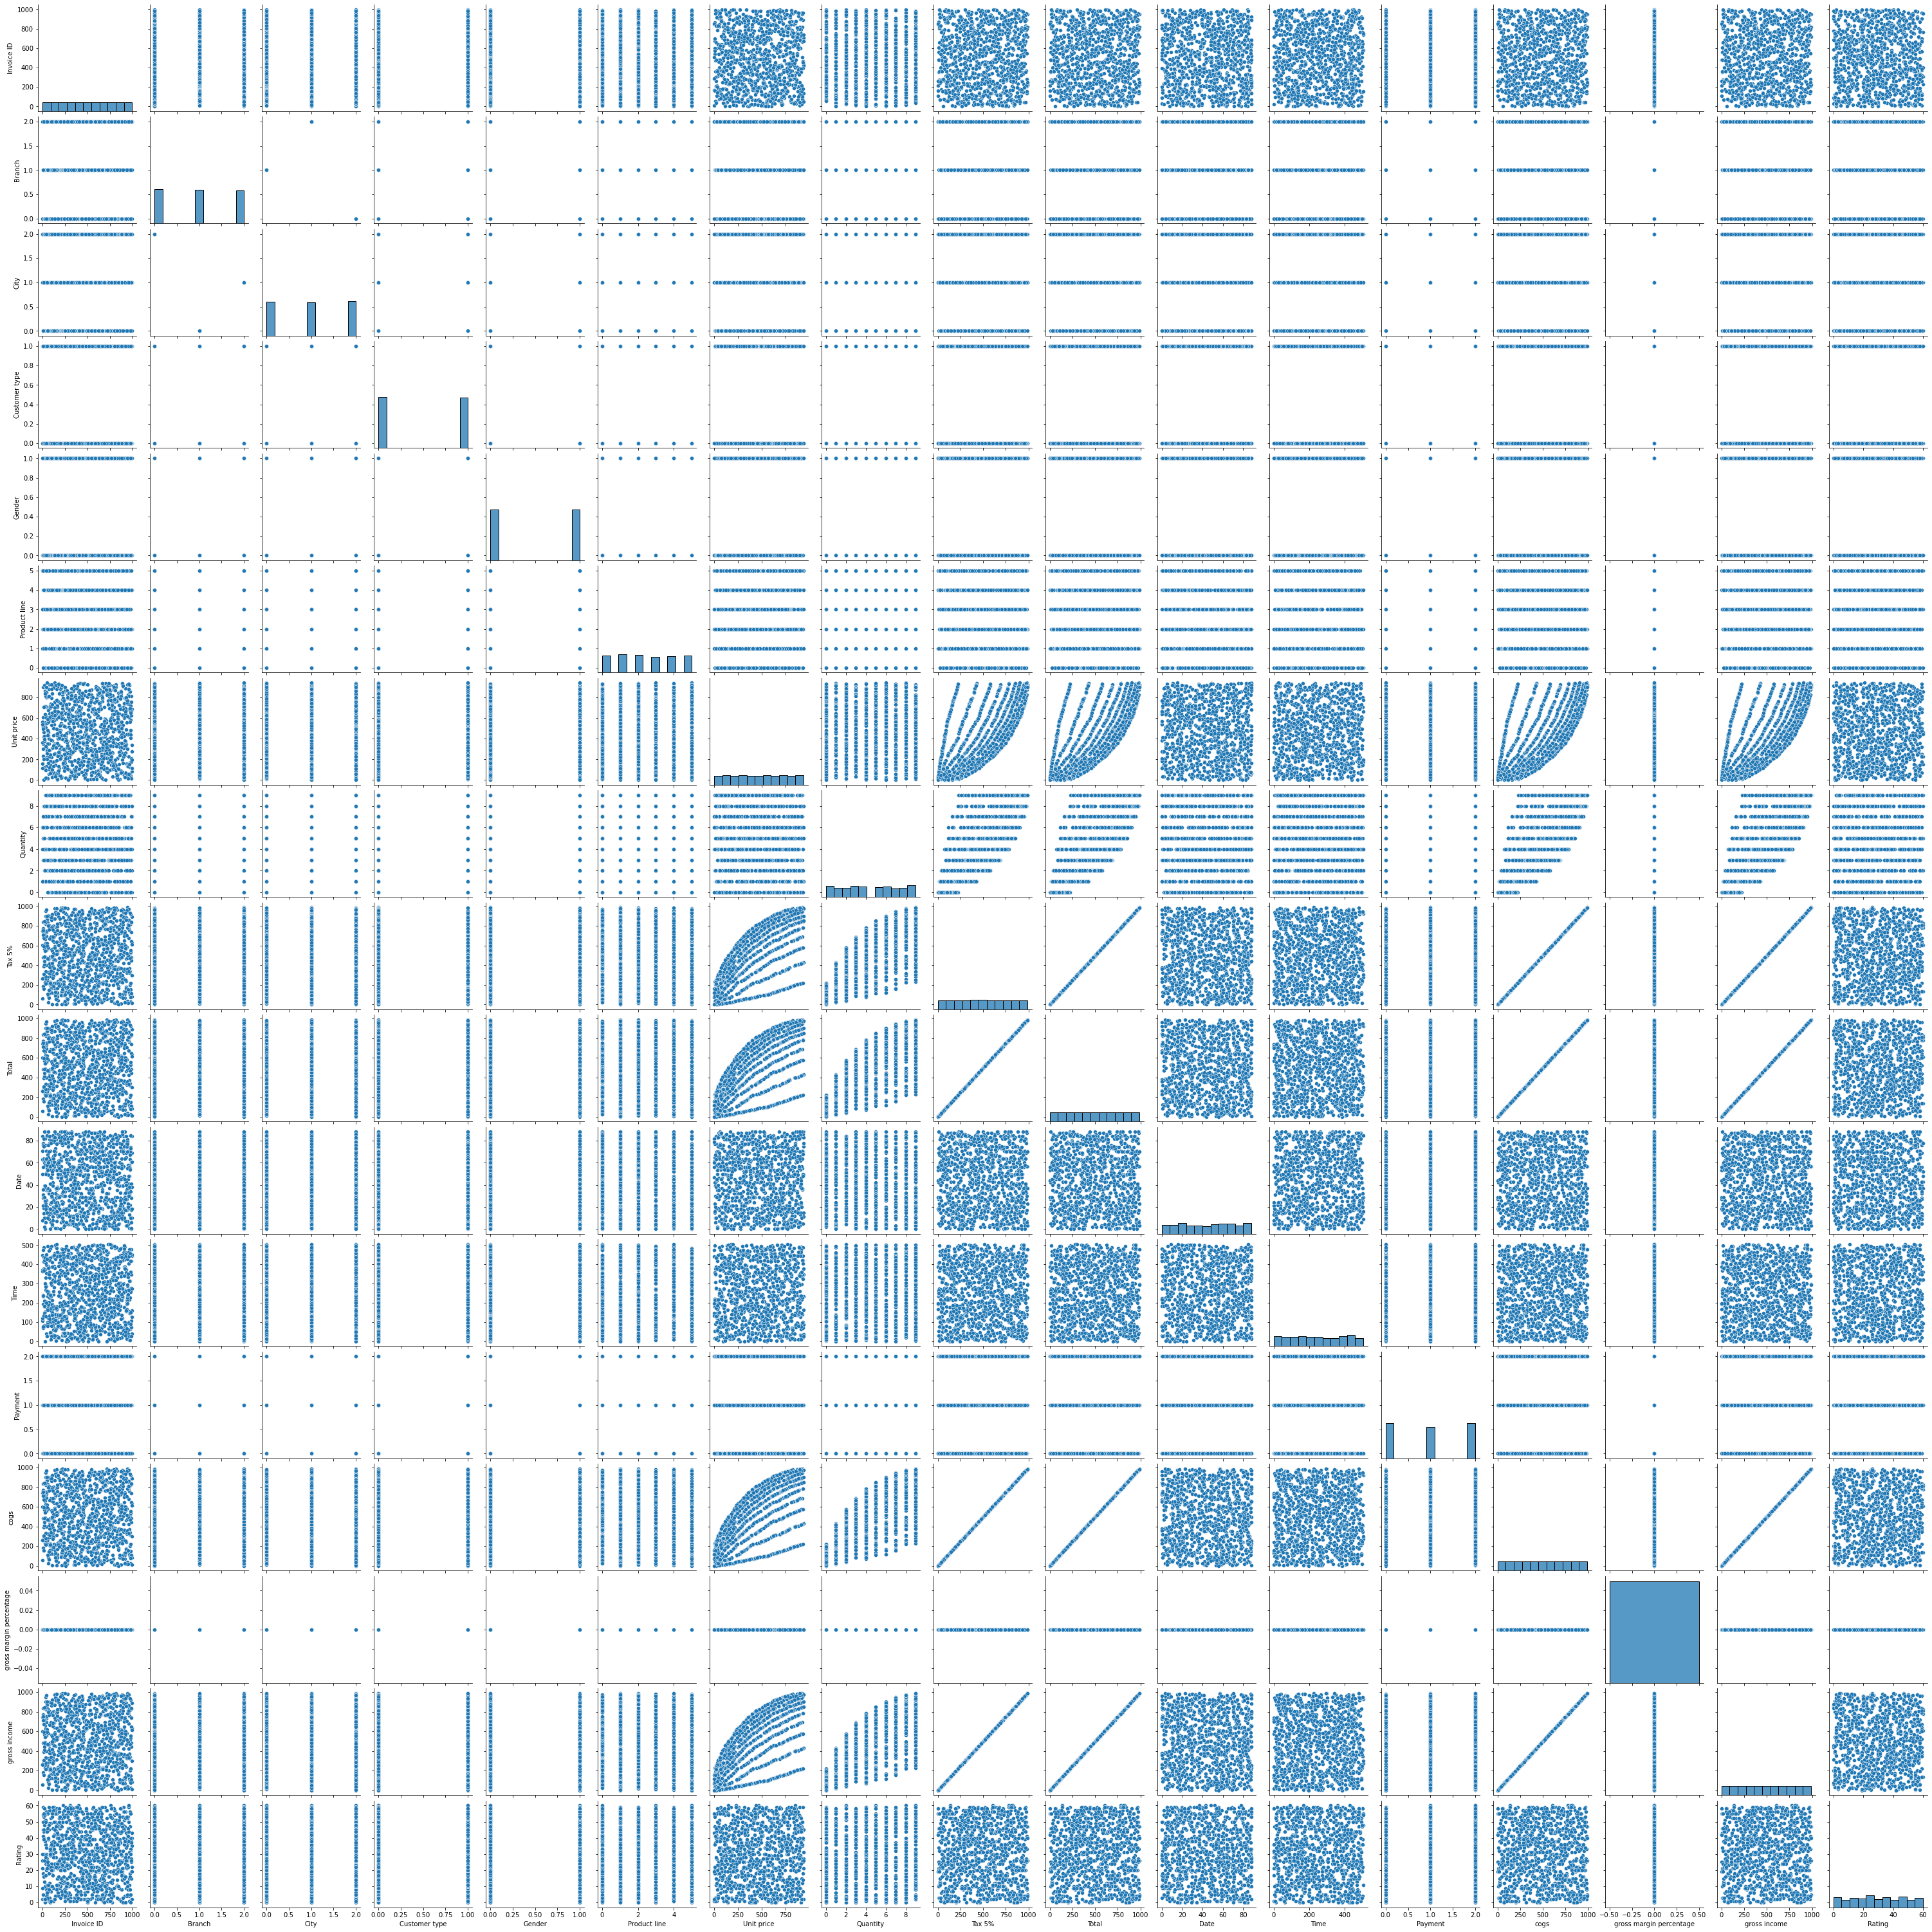

In [87]:
sns.pairplot(df)

C:\Users\Mortal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit price', ylabel='Density'>

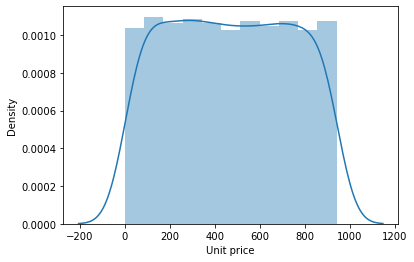

In [88]:
sns.distplot(df["Unit price"])

In [89]:
df = df.sort_values('Unit price',ascending=False).iloc[216:]

C:\Users\Mortal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit price', ylabel='Density'>

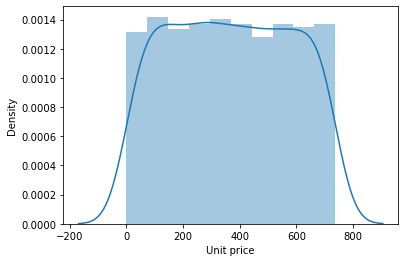

In [90]:
sns.distplot(df["Unit price"])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 575 to 944
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Invoice ID               784 non-null    int32
 1   Branch                   784 non-null    int32
 2   City                     784 non-null    int32
 3   Customer type            784 non-null    int32
 4   Gender                   784 non-null    int32
 5   Product line             784 non-null    int32
 6   Unit price               784 non-null    int64
 7   Quantity                 784 non-null    int64
 8   Tax 5%                   784 non-null    int64
 9   Total                    784 non-null    int64
 10  Date                     784 non-null    int32
 11  Time                     784 non-null    int32
 12  Payment                  784 non-null    int32
 13  cogs                     784 non-null    int64
 14  gross margin percentage  784 non-null    int64
 15  gros

In [92]:
X = df.drop('Unit price',axis = 1)
y = df['Unit price']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 23)

In [94]:
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

In [95]:
model.compile(loss='mse', optimizer = Adam(learning_rate=0.1))

In [96]:
model.fit(x=X_train, y=y_train, epochs = 200, validation_split=0.2, batch_size = 128, verbose = 1, callbacks = EarlyStopping(monitor='loss', patience=10))

Epoch 1/200
4/4 [==============================] - 2s 54ms/step - loss: 108532.3203 - val_loss: 25344.9141
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 33604.2422 - val_loss: 43874.9727
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 38526.7734 - val_loss: 31319.1504
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 34199.2812 - val_loss: 24826.3027
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 33122.0430 - val_loss: 26581.3027
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 32335.1504 - val_loss: 24943.7578
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 30901.1387 - val_loss: 25115.1914
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 31062.8984 - val_loss: 24715.8516
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 30601.7070 - val_loss: 25502.6738
Epoch 10/200
4/4 [==============================] - 0

<AxesSubplot:>

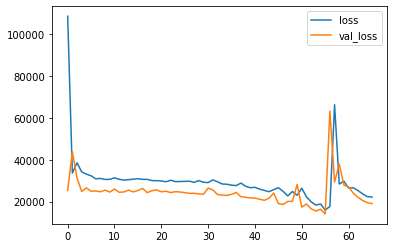

In [97]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [98]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [99]:
r2_score(y_test,y_pred)

0.3881133336835004

Text(0, 0.5, 'Predicted Value')

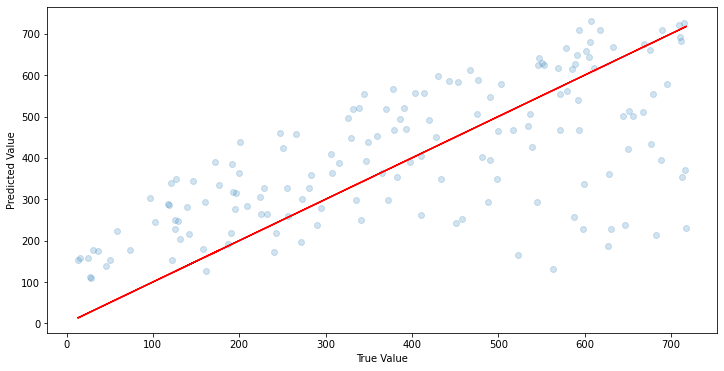

In [100]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.plot(y_test,y_test,'r')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 17)                289       
                                                                 
 dense_17 (Dense)            (None, 10)                180       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 590
Trainable params: 590
Non-trainable params: 0
_________________________________________________________________


In [102]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 23)

In [104]:
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

In [105]:
model.compile(loss='mse', optimizer = Adam(learning_rate=0.005))

In [136]:
model.fit(x=X_train, y=y_train, epochs = 300, validation_split=0.2, batch_size = 128, verbose = 2, callbacks = EarlyStopping(monitor='loss', patience=10))

Epoch 1/300
4/4 - 0s - loss: 3039.8892 - val_loss: 3439.8921 - 68ms/epoch - 17ms/step
Epoch 2/300
4/4 - 0s - loss: 2549.6487 - val_loss: 3154.6562 - 29ms/epoch - 7ms/step
Epoch 3/300
4/4 - 0s - loss: 2323.5735 - val_loss: 3792.1116 - 19ms/epoch - 5ms/step
Epoch 4/300
4/4 - 0s - loss: 2402.5715 - val_loss: 3129.0708 - 18ms/epoch - 4ms/step
Epoch 5/300
4/4 - 0s - loss: 2182.7407 - val_loss: 3190.8557 - 19ms/epoch - 5ms/step
Epoch 6/300
4/4 - 0s - loss: 2171.4775 - val_loss: 3362.1191 - 20ms/epoch - 5ms/step
Epoch 7/300
4/4 - 0s - loss: 2225.3616 - val_loss: 3335.2693 - 21ms/epoch - 5ms/step
Epoch 8/300
4/4 - 0s - loss: 3006.9348 - val_loss: 4741.4873 - 18ms/epoch - 5ms/step
Epoch 9/300
4/4 - 0s - loss: 3040.4248 - val_loss: 3485.0818 - 20ms/epoch - 5ms/step
Epoch 10/300
4/4 - 0s - loss: 2289.8123 - val_loss: 3265.6992 - 20ms/epoch - 5ms/step
Epoch 11/300
4/4 - 0s - loss: 2238.4937 - val_loss: 3209.4648 - 20ms/epoch - 5ms/step
Epoch 12/300
4/4 - 0s - loss: 3081.2754 - val_loss: 3489.2988 

<AxesSubplot:>

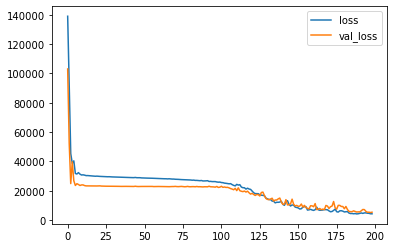

In [107]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [108]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [109]:
r2_score(y_test,y_pred)

0.7998439338599208

Text(0, 0.5, 'Predicted Value')

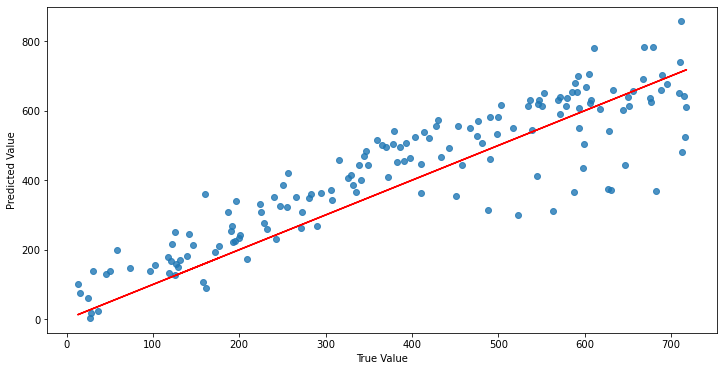

In [134]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha = 0.8)
plt.plot(y_test,y_test,'r')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 23)

In [112]:
model = Sequential([Dense(17,activation='relu'),Dropout(0.1), Dense(10,activation='relu'),Dropout(0.1),Dense(10,activation='relu'),Dense(1)])

In [113]:
model.compile(loss='mse', optimizer = Adam(learning_rate=0.005))

In [114]:
model.fit(x=X_train, y=y_train, epochs = 300, validation_split=0.2, batch_size = 128, verbose = 1, callbacks = EarlyStopping(monitor='loss', patience=10))

Epoch 1/300
4/4 [==============================] - 0s 31ms/step - loss: 113877.7969 - val_loss: 35870.1641
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 47671.3320 - val_loss: 27386.6816
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 48301.9922 - val_loss: 29725.3066
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 47937.4531 - val_loss: 26409.3867
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 40121.4531 - val_loss: 29003.8594
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 40721.0234 - val_loss: 32290.2598
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 41446.0234 - val_loss: 30939.7910
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 38380.0352 - val_loss: 27569.6621
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 37428.5586 - val_loss: 25711.0820
Epoch 10/300
4/4 [==============================] - 

<AxesSubplot:>

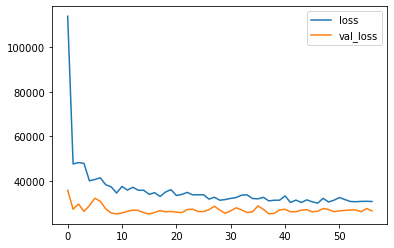

In [115]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [116]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [117]:
r2_score(y_test,y_pred)

0.12620378469263127

Text(0, 0.5, 'Predicted Value')

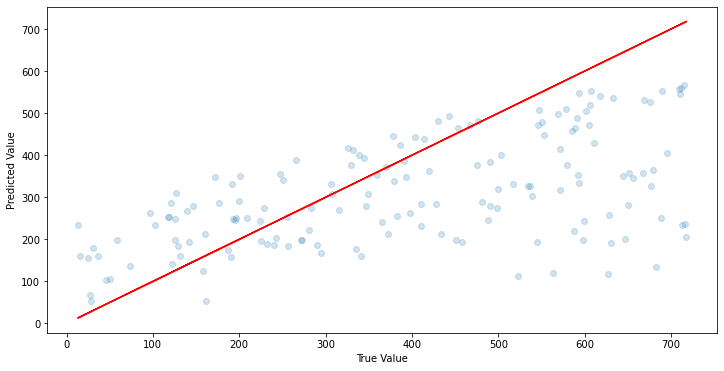

In [118]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.plot(y_test,y_test,'r')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [119]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 23)

In [121]:
model = Sequential([Dense(17,activation='relu',kernel_regularizer = l1(0.01)), Dense(10,activation='relu', kernel_regularizer = l1(0.01)), Dense(10,activation='relu'), Dense(1)])

In [122]:
model.compile(loss='mse', optimizer = Adam(learning_rate=0.005))

In [123]:
model.fit(x=X_train, y=y_train, epochs = 300, validation_split=0.2, batch_size = 128, verbose = 1, callbacks = EarlyStopping(monitor='loss', patience=10))

Epoch 1/300
4/4 [==============================] - 0s 34ms/step - loss: 44921.1953 - val_loss: 29408.7910
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 36208.0156 - val_loss: 27762.6191
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 32175.8438 - val_loss: 25582.6035
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 31637.9609 - val_loss: 25920.4824
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 31356.6738 - val_loss: 24391.3145
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 30648.2168 - val_loss: 24499.5898
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 30651.5234 - val_loss: 24372.0117
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 30305.8809 - val_loss: 24193.1016
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 30185.2988 - val_loss: 23973.2949
Epoch 10/300
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 21602.1113 - val_loss: 15897.1875
Epoch 79/300
4/4 [==============================] - 0s 6ms/step - loss: 19109.0488 - val_loss: 17099.5488
Epoch 80/300
4/4 [==============================] - 0s 6ms/step - loss: 18946.1504 - val_loss: 15626.8721
Epoch 81/300
4/4 [==============================] - 0s 6ms/step - loss: 18606.0312 - val_loss: 14714.7695
Epoch 82/300
4/4 [==============================] - 0s 6ms/step - loss: 18443.6562 - val_loss: 15362.7822
Epoch 83/300
4/4 [==============================] - 0s 6ms/step - loss: 16928.8027 - val_loss: 16052.1162
Epoch 84/300
4/4 [==============================] - 0s 6ms/step - loss: 17284.8027 - val_loss: 18625.9473
Epoch 85/300
4/4 [==============================] - 0s 6ms/step - loss: 17961.5371 - val_loss: 15871.0811
Epoch 86/300
4/4 [==============================] - 0s 6ms/step - loss: 17645.0684 - val_loss: 14323.3340
Epoch 87/300
4/4 [==============================] - 0s 6ms/

<AxesSubplot:>

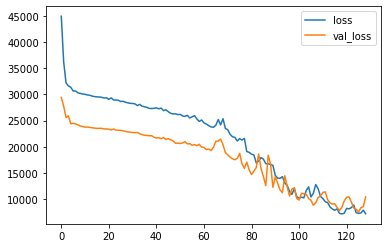

In [124]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [125]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [126]:
r2_score(y_test,y_pred)

0.6864580219442641

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 23)

In [128]:
model = Sequential([Dense(17,activation='relu',kernel_regularizer = l2(0.01)), Dense(10,activation='relu', kernel_regularizer = l2(0.01)), Dense(10,activation='relu'), Dense(1)])

In [129]:
model.compile(loss='mse', optimizer = Adam(learning_rate=0.005))

In [130]:
model.fit(x=X_train, y=y_train, epochs = 300, validation_split=0.2, batch_size = 128, verbose = 1, callbacks = EarlyStopping(monitor='loss', patience=10))

Epoch 1/300
4/4 [==============================] - 0s 39ms/step - loss: 394821.0312 - val_loss: 294967.0312
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 254623.4219 - val_loss: 197472.0469
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 171471.4062 - val_loss: 133436.5625
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 116387.5938 - val_loss: 82534.6953
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 69953.6250 - val_loss: 43224.9531
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 40141.0391 - val_loss: 24559.7949
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 32646.5352 - val_loss: 31651.0449
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 39011.5039 - val_loss: 31312.2695
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 34902.1055 - val_loss: 24650.7695
Epoch 10/300
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 27505.4746 - val_loss: 22594.2910
Epoch 79/300
4/4 [==============================] - 0s 7ms/step - loss: 27327.3477 - val_loss: 22146.0527
Epoch 80/300
4/4 [==============================] - 0s 7ms/step - loss: 27282.6562 - val_loss: 22060.6895
Epoch 81/300
4/4 [==============================] - 0s 6ms/step - loss: 27228.3809 - val_loss: 22042.8027
Epoch 82/300
4/4 [==============================] - 0s 6ms/step - loss: 27082.3242 - val_loss: 22148.1816
Epoch 83/300
4/4 [==============================] - 0s 6ms/step - loss: 27240.1016 - val_loss: 22223.9590
Epoch 84/300
4/4 [==============================] - 0s 6ms/step - loss: 27275.6992 - val_loss: 21968.7480
Epoch 85/300
4/4 [==============================] - 0s 6ms/step - loss: 27058.7754 - val_loss: 21914.9922
Epoch 86/300
4/4 [==============================] - 0s 7ms/step - loss: 27115.5371 - val_loss: 22061.6094
Epoch 87/300
4/4 [==============================] - 0s 7ms/

Epoch 155/300
4/4 [==============================] - 0s 6ms/step - loss: 8036.9419 - val_loss: 7973.5376
Epoch 156/300
4/4 [==============================] - 0s 7ms/step - loss: 7693.2725 - val_loss: 8333.3379
Epoch 157/300
4/4 [==============================] - 0s 6ms/step - loss: 7726.7432 - val_loss: 7635.6206
Epoch 158/300
4/4 [==============================] - 0s 6ms/step - loss: 7476.5688 - val_loss: 7432.4150
Epoch 159/300
4/4 [==============================] - 0s 6ms/step - loss: 7334.1938 - val_loss: 7625.4854
Epoch 160/300
4/4 [==============================] - 0s 6ms/step - loss: 8341.5244 - val_loss: 8477.2441
Epoch 161/300
4/4 [==============================] - 0s 6ms/step - loss: 8240.9883 - val_loss: 7325.2046
Epoch 162/300
4/4 [==============================] - 0s 6ms/step - loss: 7158.3130 - val_loss: 7093.9487
Epoch 163/300
4/4 [==============================] - 0s 6ms/step - loss: 6672.4731 - val_loss: 6910.2192
Epoch 164/300
4/4 [==============================] - 0s

<AxesSubplot:>

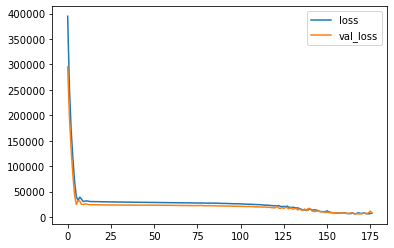

In [131]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [132]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [133]:
r2_score(y_test,y_pred)

0.7633419709752218